<a href="https://colab.research.google.com/github/Scott16198/Scott16198/blob/main/SLMLTitanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing packages for a neural network on the Titanic dataset

In [184]:
from google.colab import files
titanic = files.upload()

Saving Titanic.csv to Titanic (4).csv


In [185]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [213]:
titanic = pd.read_csv('Titanic.csv')
y = titanic['Survived'] 
X = titanic.drop(['SibSp'], axis = 1) 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looking at the Data 

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [215]:
print(X_train.shape)
print(X_train.columns)

(668, 11)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [216]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Survived     668 non-null    int64  
 2   Pclass       668 non-null    int64  
 3   Name         668 non-null    object 
 4   Sex          668 non-null    object 
 5   Age          536 non-null    float64
 6   Parch        668 non-null    int64  
 7   Ticket       668 non-null    object 
 8   Fare         668 non-null    float64
 9   Cabin        149 non-null    object 
 10  Embarked     666 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 62.6+ KB


## We see  'Age', 'Cabin and 'Embarked' is missing data. Neural networks dont handle missing data

In [217]:
X_train.describe()

,PassengerId,Survived,Pclass,Age,Parch,Fare
count,668.000000,668.000000,668.000000,536.000000,668.000000,668.000000
mean,447.450599,0.378743,2.333832,29.421343,0.372754,32.179397
std,258.038366,0.485437,0.823707,14.526010,0.795588,51.604012
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,221.750000,0.000000,2.000000,20.750000,0.000000,7.925000
50%,452.500000,0.000000,3.000000,28.000000,0.000000,14.400000
75%,673.500000,1.000000,3.000000,38.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,6.000000,512.329200


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


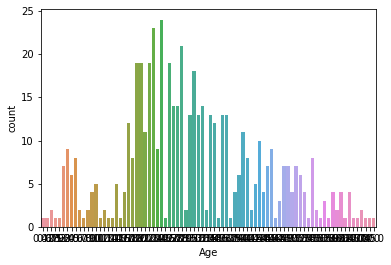

In [218]:
sns.countplot(X_train['Age'], data = X_train)

## *HeatMap of missing Age, Cabin, and Embarked data*

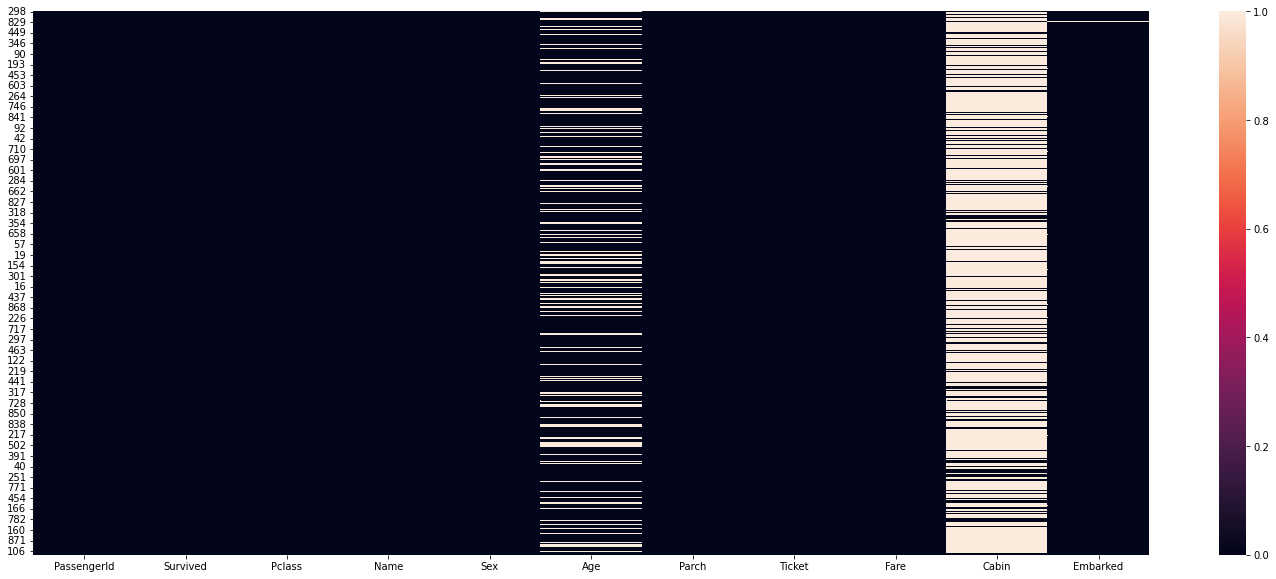

In [219]:
plt.figure(figsize = (25, 10))

sns.heatmap(X_train.isnull())

In [220]:
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].median())

X_train['Embarked'] = X_train['Embarked'].fillna('Q')
X_test['Embarked'] = X_test['Embarked'].fillna('Q')

X_train['Embarked'] = X_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
X_test['Embarked'] = X_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())

# And then lets convert some columns to int64

X_train['Fare'] = X_train['Fare'].astype(int)
X_test['Fare'] = X_test['Fare'].astype(int)

X_train['Age'] = X_train['Age'].astype(int)
X_test['Age'] = X_test['Age'].astype(int)


# Let's drop the Cabin column because it has many missing values

X_train = X_train.drop(columns = ['Cabin'])
X_test = X_test.drop(columns = ['Cabin'])

# Also i am dropping ticket column because it doesn't effecting the output.

X_train =  X_train.drop(columns = ['Ticket'])
X_test = X_test.drop(columns = ['Ticket'])
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked
298,299,1,1,"Saalfeld, Mr. Adolphe",male,28,0,30,0
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25,0,7,0
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24,2,14,0
478,479,0,3,"Karlsson, Mr. Nils August",male,22,0,7,0
305,306,1,1,"Allison, Master. Hudson Trevor",male,0,2,151,0


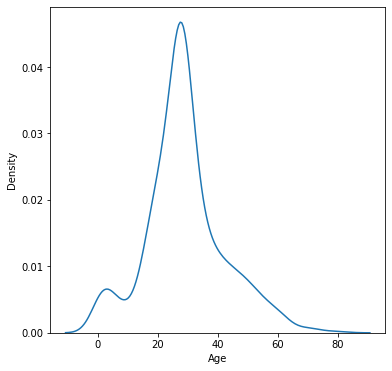

In [221]:
plt.figure(figsize = (6, 6))

# Age column is already normalized as you can see in the graph below.
sns.kdeplot(x = X_train['Age'], data = X_train)

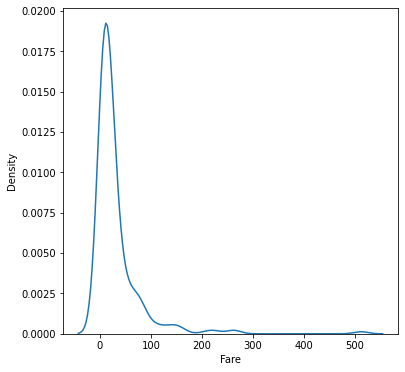

In [222]:
plt.figure(figsize = (6, 6))

# Fare column is not normalized, so we need to normalized it first. Because neural network works with normalized data.
sns.kdeplot(x = X_train['Fare'], data = X_train)

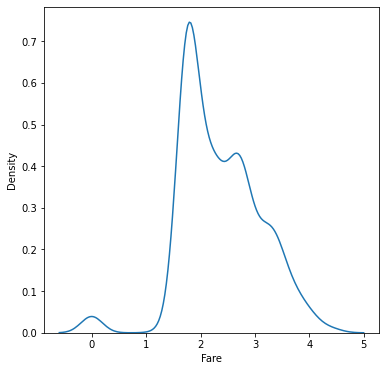

In [223]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

X_train['Fare'] = X_train['Fare'].clip(1, max(X_train['Fare']))
X_train['Fare'] = stats.boxcox(X_train['Fare'])[0]

X_test['Fare'] = X_test['Fare'].clip(1, max(X_test['Fare']))
X_test['Fare'] = stats.boxcox(X_test['Fare'])[0]

plt.figure(figsize = (6, 6))

# Fare column is not normalized, so we need to normalized it first. Because neural network works with normalized data.
sns.kdeplot(x = X_train['Fare'], data = X_train)

/usr/local/lib/python3.7/dist-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


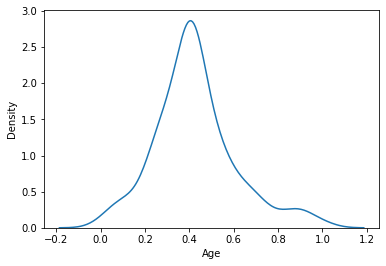

In [224]:
# One final step: Let's scale the age and fare column.

X_train['Fare'] = minmax_scaling(X_train['Fare'], columns = [0])
X_test['Fare'] = minmax_scaling(X_test['Fare'], columns = [0])

X_train['Age'] = minmax_scaling(X_train['Age'], columns = [0])
X_test['Age'] = minmax_scaling(X_test['Age'], columns = [0])

sns.kdeplot(x = X_test['Age'], data = X_test)

In [229]:
#X_train = X_train.drop(columns = ['Name'])
#X_test = X_test.drop(columns = ['Name'])

#X_train = X_train.drop(columns = ['PassengerId'])
#X_test = X_test.drop(columns = ['PassengerId'])

In [166]:
print(X_train['Sex'].value_counts())

male      439
female    229
Name: Sex, dtype: int64


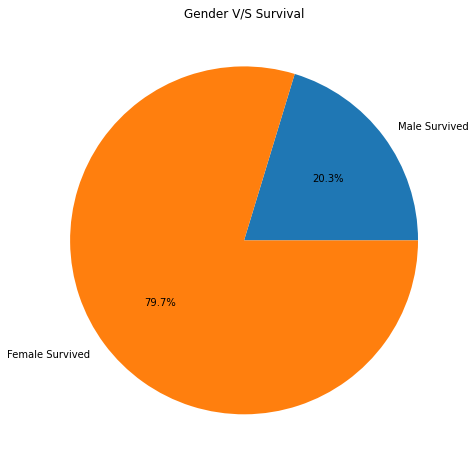

In [230]:
total_male = 439

total_female = 229

total_male_survived = len(X_train.loc[(X_train['Sex'] == 'male') & (X_train['Survived'] == 1)])

total_female_survived = len(X_train.loc[(X_train['Sex'] == 'female') & (X_train['Survived'] == 1)])

male_survival_percentage = (total_male_survived / total_male) * 100

female_survival_percentage = (total_female_survived / total_female ) * 100

print()
y = np.array([male_survival_percentage, female_survival_percentage])

plt.figure(figsize = (8, 8))

plt.title("Gender V/S Survival")

plt.pie(y, labels = ['Male Survived', 'Female Survived'], autopct='%1.1f%%')

plt.show()

In [231]:
X_train['Sex'] = X_train['Sex'].map({'male': 1, 'female': 0})
X_test['Sex'] = X_test['Sex'].map({'male': 1, 'female': 0})

In [232]:
from sklearn.feature_selection import mutual_info_classif

discrete_features = X_train.dtypes == int

y = X_train['Survived']

X_train = X_train.drop(columns = ['Survived'])
def make_mi_scores(X, y, discrete_features):
    
    mi_scores = mutual_info_classif(X, y, random_state = 0)
    
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X.columns)
    
    mi_scores = mi_scores.sort_values(ascending = False)
    
    return mi_scores


mi_scores = make_mi_scores(X_train.select_dtypes(include=['int64']), y, discrete_features)

mi_scores

Sex         0.116814
Pclass      0.048914
Embarked    0.038165
Parch       0.025412
Name: MI Scores, dtype: float64

In [236]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([

    layers.Dense(8, activation = 'relu', input_shape = (7,)),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(1, activation = 'relu')
])
model.summary()

model.compile(
    
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
    
)

X_train = np.asarray(X_train).astype(np.int)

y_train = np.asarray(y).astype(np.int)


history = model.fit(
    
    X_train, y_train, epochs = 10, verbose = 0)
  

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 8)                 64        
                                                                 
 dense_34 (Dense)            (None, 4)                 36        
                                                                 
 dense_35 (Dense)            (None, 1)                 5         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

ValueError: ignored

##Ready for an evaluation

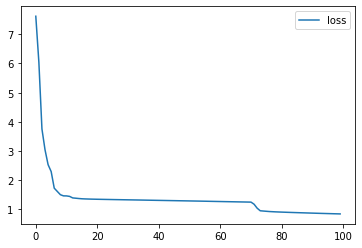

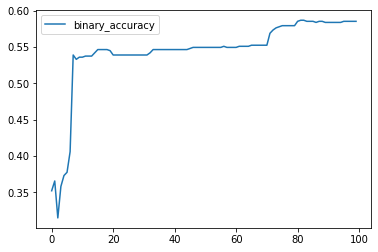

In [237]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss']].plot()
history_frame.loc[:, ['binary_accuracy']].plot();

##Experimental Neural network gives 54 %  Quite lousy